# Three ANN Models 
1. MLP
2. CNN
3. RNN & LSTM

11493376/11490434 [==============================] - 0s 0us/step
5


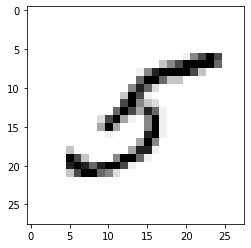

(60000, 28, 28)
(10000, 28, 28)


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
image_index = 35
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

print(x_train.shape)
print(x_test.shape)

In [2]:
from keras.utils import to_categorical
num_classes = 10

print(y_train[:image_index + 1])
y_train = to_categorical(y_train, num_classes)
print(y_train[:image_index + 1])
y_test = to_categorical(y_test, num_classes)

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [

# 1. Mnist Training with MLP (Multi Layer Perceptron)
* https://towardsdatascience.com/beginners-guide-to-building-neural-networks-in-tensorflow-dab7a09b941d

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install -q tensorflow-gpu==2.0.0-rc1 # tensorflow gpu version 설치

     |████████████████████████████████| 380.5MB 43kB/s 
     |████████████████████████████████| 501kB 50.2MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 4.3MB 56.0MB/s 


In [4]:
import tensorflow as tf
tf.__version__

'2.3.0'

## 1. baseline code 

In [5]:
# 1. dataset 생성하기 
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # image scaling : (0,1) 범위로 바꿔주기 

# 2. model 구성하기 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 3. model 학습과정 설정하기 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. model 학습시키기 
history = model.fit(x_train, y_train, epochs=3)

# 5. model 평가하기 
print("test loss, test acc:", model.evaluate(x_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2968 - accuracy: 0.9135
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1426 - accuracy: 0.9577
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0856 - accuracy: 0.9727
test loss, test acc: [0.08560201525688171, 0.9726999998092651]


In [6]:
# 6. model 구조 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


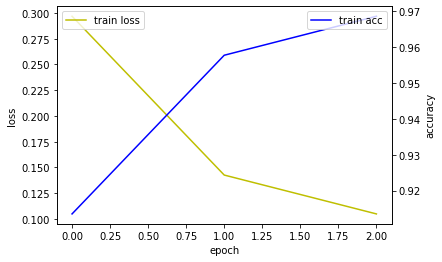

In [7]:
# 7. model 학습 결과 시각화 
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

# train loss 
loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

# train accuracy 
acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

## 2. model 구조 변환하기 
* Hidden Layer : 3
* epoch : 50 
* Activation Function : ReLU 
    - f(x) = max(0,x) 
    - f'(x) = 0 if x<=0 else 1 
* WeightInitialization : He normalization 
    - Neural Network 학습 전 가중치들을 초기화하는 과정 
    - Gradient Vanishing / Exploding 방지
    - ReLU가 0 이하의 신호를 제거하기 때문에, 분산을 두배 주어 분산을 유지한다는 의도
* BatchNormalization 
    - Mini Batch를 뽑아서, 해당 Batch에서 Normalization을 거치는 과정 
    - propagation 중 parameter 크기에 영향 받지 않아서, 속도를 향상시킬 수 있음 
* Optimization : RAdamOptimizer
    - 목적함수 f의 최솟값을 찾는 알고리즘 
    - Adam (Adaptive Optimizer) : 상대적인 업데이트 양에 따라 step size를 조정 
    - RAdam (Rectified Adam) : adaptive learning rate term의 분산을 rectify 함으로써, 학습의 안정성 확보 
* EarlyStopping
    - 더 이상 개선의 여지가 없을 때 학습을 종료시키는 콜백함수

In [8]:
# 0. 교차검증을 위해, train/validation set으로 나누기 
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=77)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(42000, 28, 28) (18000, 28, 28) (42000,) (18000,)


In [10]:
!pip install keras-rectified-adam

  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-cp36-none-any.whl size=14783 sha256=b10c8850021ad7ff38a076304cae64a187ab786e4a18777e36594a9a0ac29fb3
  Stored in directory: /root/.cache/pip/wheels/7b/01/27/3a934e1a5644f5b93c720422a6ef97034ea78a21ba71cfb549
Successfully built keras-rectified-adam


In [11]:
from keras_radam.training import RAdamOptimizer
from keras.callbacks import EarlyStopping

In [21]:
# 1. model 구성하기 
num_classes = 10
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),                     

        tf.keras.layers.Dense(256, kernel_initializer="he_normal"),
        tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(64, kernel_initializer="he_normal"),
        tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(16, kernel_initializer="he_normal"),
        tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(num_classes, activation="softmax", kernel_initializer="he_normal"),
        
])

In [22]:
# 2. optimizer 지정
model.compile(optimizer = RAdamOptimizer(learning_rate=1e-4), loss="sparse_categorical_crossentropy", metrics=["acc"])

# 3. model 구조 파악
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
re_lu_10 (ReLU)              (None, 256)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_12 (Batc (None, 64)               

In [23]:
# 4. early stopping 설정 
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20) # 조기종료 콜백함수 정의

In [24]:
# 5. model 학습시키기 
history = model.fit(x_train, y_train, epochs=50, batch_size=10, validation_data=(x_val, y_val), verbose=1)

Epoch 1/50
4200/4200 [==============================] - 25s 6ms/step - loss: 1.9958 - acc: 0.4441 - val_loss: 1.2648 - val_acc: 0.8543
Epoch 2/50
4200/4200 [==============================] - 25s 6ms/step - loss: 1.1240 - acc: 0.7394 - val_loss: 0.5085 - val_acc: 0.9129
Epoch 3/50
4200/4200 [==============================] - 24s 6ms/step - loss: 0.7418 - acc: 0.8014 - val_loss: 0.2372 - val_acc: 0.9454
Epoch 4/50
4200/4200 [==============================] - 25s 6ms/step - loss: 0.6072 - acc: 0.8285 - val_loss: 0.2499 - val_acc: 0.9333
Epoch 5/50
4200/4200 [==============================] - 25s 6ms/step - loss: 0.5350 - acc: 0.8456 - val_loss: 0.1900 - val_acc: 0.9479
Epoch 6/50
4200/4200 [==============================] - 25s 6ms/step - loss: 0.5071 - acc: 0.8544 - val_loss: 0.2148 - val_acc: 0.9411
Epoch 7/50
4200/4200 [==============================] - 25s 6ms/step - loss: 0.4733 - acc: 0.8644 - val_loss: 0.1483 - val_acc: 0.9583
Epoch 8/50
4200/4200 [==============================] -

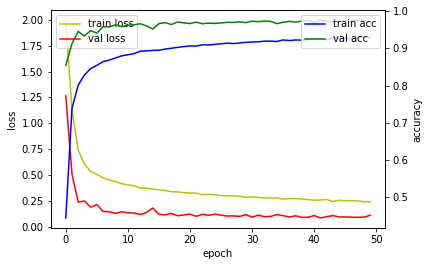

In [25]:
# 6. model 학습 결과 시각화 
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

# train / val loss 
loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

# train / val accuracy 
acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

In [26]:
# 7. model 평가하기 
print("test loss, test acc:", model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.1019 - acc: 0.9717
test loss, test acc: [0.1019098162651062, 0.9717000126838684]


# 2. Mnist Training with Convolutional Neural Network (CNN) 

## 1. baseline code 
* Convolution -> Pooling -> Convolution -> Pooling -> Fully Connected Layer -> Output



* https://www.sitepoint.com/keras-digit-recognition-tutorial/
* https://victorzhou.com/blog/keras-cnn-tutorial/

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical

In [28]:
import pandas as pd 
import numpy as np

import random

In [31]:
# 1. dataset 생성하기 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images : (-0.5, 0.5) 범위로 만들어주기 
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [34]:
# Reshape the images 
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [35]:
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [36]:
# train / validation split 
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.3, random_state=77)
print(train_images.shape, val_images.shape, train_labels.shape, val_labels.shape)

(42000, 28, 28, 1) (18000, 28, 28, 1) (42000,) (18000,)


In [37]:
num_filters = 8
filter_size = 3

# 2. model 구성하기 
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=2), Flatten(), Dense(10, activation='softmax'),
])

# 3. model compile 
model.compile(
  'adam', loss='categorical_crossentropy', metrics=['accuracy'],
)

In [38]:
# 4. model 구조 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


In [39]:
# 5. model 학습시키기 
history = model.fit(
                    train_images, to_categorical(train_labels), epochs=3,
                    validation_data=(val_images, to_categorical(val_labels)),
                    ) 

Epoch 1/3
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3887 - accuracy: 0.8886 - val_loss: 0.2397 - val_accuracy: 0.9307
Epoch 2/3
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2002 - accuracy: 0.9437 - val_loss: 0.1713 - val_accuracy: 0.9508
Epoch 3/3
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1468 - accuracy: 0.9589 - val_loss: 0.1496 - val_accuracy: 0.9550


In [40]:
# 6. model 평가하기 
print("test loss, test acc:", model.evaluate(test_images, to_categorical(test_labels)))

313/313 [==============================] - 1s 2ms/step - loss: 0.1392 - accuracy: 0.9602
test loss, test acc: [0.13919305801391602, 0.9602000117301941]


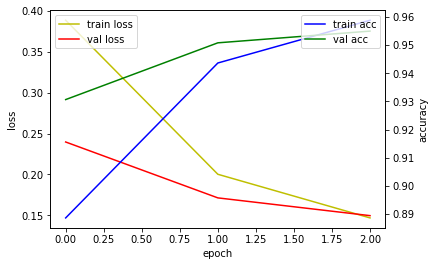

In [41]:
# 7. model 학습 결과 시각화 
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

# train / val loss 
loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

# train / val accuracy 
acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

## 2. model 구조 변환하기 
* Functional API 적용 
* Data Augmentation
    - 기존 데이터에서 새로운 데이터를 생성해 인공적으로 training set의 크기를 늘리는 방법
    - 이미지 회전, 이동
* Learning Rate Scheduling (성능 기반 스케쥴링) 
    - 매 N 스텝마다 (조기 종료처럼) 검증 오차를 측정하고, 오차가 줄어들지 않으면 $\lambda$배 만큼 학습률을 감소시키는 방법 

In [47]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
# 1. model 구성하기 
inputs = tf.keras.Input(shape=(28, 28, 1), name="mnist")

x = tf.keras.layers.Conv2D(32, 3, activation="relu")(inputs)
x = tf.keras.layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = tf.keras.layers.MaxPooling2D(3)(x)

x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = tf.keras.layers.add([x, block_1_output])

x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = tf.keras.layers.add([x, block_2_output])

x = tf.keras.layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
mnist (InputLayer)              [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 26, 26, 32)   320         mnist[0][0]                      
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 24, 24, 64)   18496       conv2d_8[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 8, 8, 64)     0           conv2d_9[0][0]                   
_________________________________________________________________________________________

In [48]:
# optimizer 
optimizer = RMSprop(learning_rate=0.002, rho=0.9, momentum=0.1, epsilon=1e-07, centered=True, name='RMSprop')

In [49]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [51]:
# data augmentation 
datagen_train = ImageDataGenerator(rotation_range = 10,
                                   width_shift_range = 0.25,
                                   height_shift_range = 0.25,
                                   shear_range = 0.1,
                                   zoom_range = 0.4,
                                   horizontal_flip = False)

datagen_val = ImageDataGenerator() 

In [50]:
batch_size = 500
num_classes = 10
epochs = 50

In [52]:
step_train = x_train.shape[0] // batch_size
step_val = x_val.shape[0] // batch_size

# Learning Rate Scheduling (Performance Scheduling) 
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau( 
    monitor='loss', factor=0.25,  patience=2, verbose=1, mode="auto", min_delta=0.0001, cooldown=0, min_lr=0.00001)

# Early Stopping 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

In [54]:
# 2. model 학습시키기 
history = model.fit_generator(datagen_train.flow(train_images, to_categorical(train_labels), batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(val_images, to_categorical(val_labels)),
                              validation_steps=50,
                              callbacks=[learning_rate_reduction, es],
                              verbose=1)

Epoch 1/50
84/84 [==============================] - 9s 107ms/step - loss: 0.3309 - accuracy: 0.9021 - val_loss: 0.1111 - val_accuracy: 0.9662
Epoch 2/50
84/84 [==============================] - 9s 105ms/step - loss: 0.2771 - accuracy: 0.9196 - val_loss: 0.0511 - val_accuracy: 0.9852
Epoch 3/50
84/84 [==============================] - 9s 106ms/step - loss: 0.2034 - accuracy: 0.9399 - val_loss: 0.1133 - val_accuracy: 0.9699
Epoch 4/50
84/84 [==============================] - 9s 106ms/step - loss: 0.1815 - accuracy: 0.9465 - val_loss: 0.0376 - val_accuracy: 0.9891
Epoch 5/50
84/84 [==============================] - 9s 106ms/step - loss: 0.1634 - accuracy: 0.9517 - val_loss: 0.0390 - val_accuracy: 0.9893
Epoch 6/50
84/84 [==============================] - 9s 107ms/step - loss: 0.1426 - accuracy: 0.9572 - val_loss: 0.0430 - val_accuracy: 0.9880
Epoch 7/50
84/84 [==============================] - 9s 110ms/step - loss: 0.1416 - accuracy: 0.9592 - val_loss: 0.0412 - val_accuracy: 0.9888
Epoch 

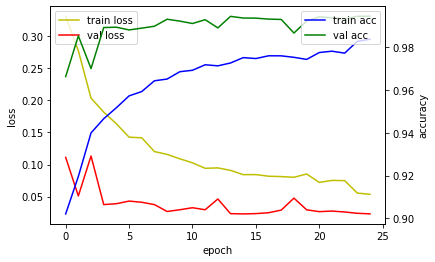

In [57]:
# 3. model 학습 결과 시각화 
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

# train / val loss 
loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

# train / val accuracy 
acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

In [58]:
# 4. model 평가하기 
print("test loss, test acc:", model.evaluate(test_images, to_categorical(test_labels)))

313/313 [==============================] - 1s 3ms/step - loss: 0.0211 - accuracy: 0.9925
test loss, test acc: [0.0211181640625, 0.9925000071525574]


# 3. Mnist Training with RNN and LSTM
* https://www.kaggle.com/muhammedfathi/mnist-with-rnn-and-lstm

In [59]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed
from keras.layers import LSTM

In [80]:
# Training parameters.
num_classes = 10

# Embedding dimensions.
row_hidden = 256
col_hidden = 256

In [70]:
# The data, split between train and test sets.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [71]:
# Reshapes data to 4D for Hierarchical RNN.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [72]:
# Converts class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [73]:
# train / validation split 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=77)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(42000, 28, 28, 1) (18000, 28, 28, 1) (42000, 10) (18000, 10)


In [88]:
row, col, pixel = x_train.shape[1:]

# 4D input.
x = Input(shape=(row, col, pixel))

# Encodes a row of pixels using TimeDistributed Wrapper.
encoded_rows = TimeDistributed(LSTM(row_hidden))(x)

# Encodes columns of encoded rows.
encoded_columns1 = LSTM(col_hidden)(encoded_rows)
encoded_columns2 = LSTM(col_hidden)(encoded_rows)

# Final predictions and model.
prediction = Dense(num_classes, activation='softmax')(encoded_columns2)
model = Model(x, prediction)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [89]:
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 28, 256)           264192    
_________________________________________________________________
lstm_16 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                2570      
Total params: 792,074
Trainable params: 792,074
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Training.
history = model.fit(
                    x_train, y_train, batch_size=32, epochs=10, verbose=1, 
                    validation_data=(x_val, y_val))

Epoch 1/10
1313/1313 [==============================] - 24s 19ms/step - loss: 0.4531 - accuracy: 0.8479 - val_loss: 0.3345 - val_accuracy: 0.8960
Epoch 2/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.1229 - accuracy: 0.9620 - val_loss: 0.1160 - val_accuracy: 0.9667
Epoch 3/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0885 - accuracy: 0.9732 - val_loss: 0.0944 - val_accuracy: 0.9722
Epoch 4/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0700 - accuracy: 0.9798 - val_loss: 0.0770 - val_accuracy: 0.9772
Epoch 5/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0568 - accuracy: 0.9831 - val_loss: 0.0521 - val_accuracy: 0.9841
Epoch 6/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0494 - accuracy: 0.9849 - val_loss: 0.0477 - val_accuracy: 0.9863
Epoch 7/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0415 - accuracy: 0.9876 - val_loss: 0.0506 -

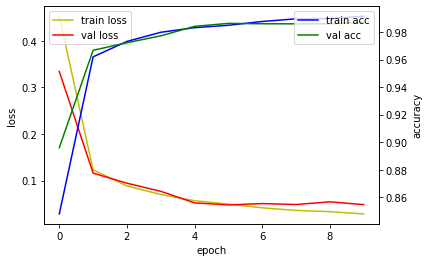

In [91]:
# visualization.
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

# train / val loss 
loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

# train / val accuracy 
acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

In [92]:
# Evaluation.
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.045092761516571045
Test accuracy: 0.9861999750137329
